In [5]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv('dataset_phishing.csv')
df.shape

(11430, 89)

In [6]:
from sklearn.model_selection import train_test_split
phishing_train, phishing_test = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
phishing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9144 entries, 3886 to 7270
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         9144 non-null   object 
 1   length_url                  9144 non-null   int64  
 2   length_hostname             9144 non-null   int64  
 3   ip                          9144 non-null   int64  
 4   nb_dots                     9144 non-null   int64  
 5   nb_hyphens                  9144 non-null   int64  
 6   nb_at                       9144 non-null   int64  
 7   nb_qm                       9144 non-null   int64  
 8   nb_and                      9144 non-null   int64  
 9   nb_or                       9144 non-null   int64  
 10  nb_eq                       9144 non-null   int64  
 11  nb_underscore               9144 non-null   int64  
 12  nb_tilde                    9144 non-null   int64  
 13  nb_percent                  91

In [8]:
phishing_train['status'].value_counts()

phishing      4586
legitimate    4558
Name: status, dtype: int64

In [9]:
phishing_test['status'].value_counts()

legitimate    1157
phishing      1129
Name: status, dtype: int64

In [10]:
def map_label (X):
    X['status'].replace(['phishing','legitimate'],['1','0'],inplace=True)
    X['status'] = X['status'].astype(int)
    return X
    
    

In [11]:
phishing_train = map_label(phishing_train)
phishing_test = map_label(phishing_test)
phishing_train.drop("url", axis=1, inplace = True)
phishing_test.drop("url", axis=1, inplace = True)


In [12]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
(phishing_train < 0).any()

length_url                    False
length_hostname               False
ip                            False
nb_dots                       False
nb_hyphens                    False
nb_at                         False
nb_qm                         False
nb_and                        False
nb_or                         False
nb_eq                         False
nb_underscore                 False
nb_tilde                      False
nb_percent                    False
nb_slash                      False
nb_star                       False
nb_colon                      False
nb_comma                      False
nb_semicolumn                 False
nb_dollar                     False
nb_space                      False
nb_www                        False
nb_com                        False
nb_dslash                     False
http_in_path                  False
https_token                   False
ratio_digits_url              False
ratio_digits_host             False
punycode                    

In [13]:
phishing_train.isnull().values.any()

False

In [14]:
import numpy as np
phishing_train[phishing_train < 0] = np.nan
phishing_test[phishing_test < 0] = np.nan

In [15]:
phishing_train.isnull().values.any()

True

In [16]:
phishing_test.isnull().values.any()

True

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [18]:
imputer.fit(phishing_train)

SimpleImputer(strategy='median')

In [19]:
X = imputer.transform(phishing_train)
Y = imputer.transform(phishing_test)

In [20]:
phishing_train = pd.DataFrame(X, columns=phishing_train.columns, index=phishing_train.index)
phishing_test = pd.DataFrame(Y, columns=phishing_test.columns, index=phishing_test.index)
phishing_train.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
3886,80.0,27.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.325000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,3.0,3.0,3.0,32.0,19.0,32.0,12.8000,11.0,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.890411,0.109589,0.0,0.0,0.0,0.375000,0.0,0.250000,1.0,0.0,85.714286,0.0,100.000000,0.000000,0.0,0.0,0.0,87.804878,0.0,0.0,0.0,1.0,0.0,0.0,214.0,152.0,5008870.0,0.0,1.0,0.0,1.0
36,113.0,24.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,4.0,2.0,20.0,2.0,20.0,20.0,10.0,5.4375,20.0,4.466667,0.0,0.0,0.0,1.0,0.0,0.0,417.0,0.311751,0.688249,0.0,0.0,0.0,0.146341,0.0,0.013937,1.0,1.0,96.666667,0.0,97.435897,2.564103,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,97.0,3920.0,0.0,0.0,0.0,2.0,1.0
10876,39.0,19.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,3.0,3.0,5.0,11.0,11.0,6.0,6.2500,7.0,5.500000,0.0,0.0,0.0,0.0,0.0,0.0,289.0,0.906574,0.093426,0.0,0.0,0.0,0.185185,0.0,0.296296,0.0,0.0,88.461538,0.0,100.000000,0.000000,0.0,0.0,0.0,29.411765,0.0,0.0,0.0,1.0,1.0,0.0,581.0,8917.0,1358.0,0.0,0.0,7.0,0.0
3058,100.0,18.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.220000,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,2.0,3.0,2.0,32.0,10.0,32.0,8.0000,6.5,8.375000,3.0,0.0,0.0,0.0,0.0,0.0,124.0,0.951613,0.048387,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,1.0,97.500000,0.0,100.000000,0.000000,0.0,0.0,0.0,88.000000,0.0,0.0,0.0,1.0,1.0,0.0,112.0,254.0,0.0,0.0,1.0,0.0,1.0
2249,27.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.037037,0.055556,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,3.0,3.0,0.0,10.0,10.0,0.0,6.5000,6.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.404255,0.595745,0.0,0.0,0.0,0.250000,0.0,0.000000,0.0,0.0,25.000000,0.0,0.000000,100.000000,0.0,0.0,0.0,27.272727,0.0,0.0,0.0,1.0,0.0,0.0,522.0,3861.0,8439309.0,0.0,0.0,2.0,0.0


In [21]:
phishing_test.isnull().values.any()

False

In [22]:
phishing_train.isnull().values.any()

False

In [23]:
zero_var = phishing_train.loc[:,phishing_train.apply(pd.Series.nunique) == 1]

In [24]:
zero_var.columns

Index(['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection',
       'ratio_intErrors', 'submit_email', 'sfh'],
      dtype='object')

In [25]:
phishing_train.drop(['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection',
       'ratio_intErrors', 'submit_email', 'sfh'], axis = 1, inplace = True)


In [26]:
phishing_test.drop(['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection',
       'ratio_intErrors', 'submit_email', 'sfh'], axis = 1, inplace = True)

In [27]:
phishing_train.shape

(9144, 82)

In [28]:
phishing_test.shape

(2286, 82)

In [29]:
phishing_play = phishing_train.copy()
phishing_play.shape

(9144, 82)

In [30]:
phishing_numerical = phishing_play.loc[:,phishing_play.apply(pd.Series.nunique) > 2]
pd.options.display.max_columns = None
pd.options.display.max_rows = None
phishing_numerical.shape

(9144, 50)

In [31]:
from scipy import stats

y = phishing_play['status'].astype(float)
list_corr=[]
list_col=[]
for column in phishing_numerical:
    x=phishing_numerical[column]
    corr = stats.pointbiserialr(list(x), list(y))
    if corr[0]>0.25 or corr[0]<-0.25:
        list_corr.append(corr[0])
        list_col.append(column)
        print(column , " : ", corr[0])

df_corr = pd.DataFrame()        
df_corr ["Attribute"] = list_col
df_corr["Point Biserial Correlation"] = list_corr
df_corr.sort_values(by=['Point Biserial Correlation'], ascending=False, inplace = True)
df_corr

nb_qm  :  0.2919249863738444
nb_www  :  -0.44218365829020867
ratio_digits_url  :  0.3575050144428749
phish_hints  :  0.33441724959354047
nb_hyperlinks  :  -0.3395404571146591
domain_age  :  -0.37756227379386803
page_rank  :  -0.5051806765226464


,Attribute,Point Biserial Correlation
2,ratio_digits_url,0.357505
3,phish_hints,0.334417
0,nb_qm,0.291925
4,nb_hyperlinks,-0.339540
5,domain_age,-0.377562
1,nb_www,-0.442184
6,page_rank,-0.505181


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


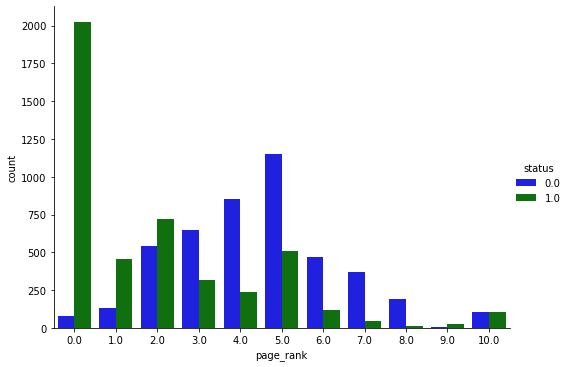

In [32]:
import seaborn as sns
tmp = phishing_train.copy()
tmp.rename(columns={1:"Phishing", 0:"Legitimate"}, inplace=True)
tmp['status'].replace(['1','0'], ['Phishing','Legitimate'], inplace=True)
sns.catplot("page_rank", hue="status", data=tmp, kind="count", 
            palette={1:"green", 0:"blue"} ,height=5.0, aspect=11.7/8.27 )

In [33]:
phishing_binary = phishing_play.loc[:,phishing_play.apply(pd.Series.nunique) == 2]
phishing_binary.shape

(9144, 32)

<AxesSubplot:>

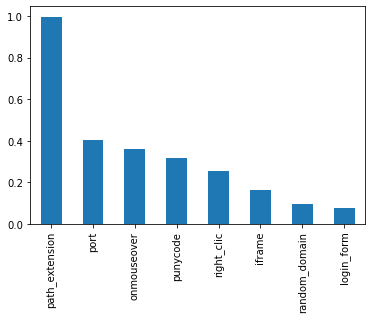

In [34]:
from sklearn.feature_selection import chi2
X = phishing_binary
y = (phishing_play['status']).astype(int)
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
mask = p_values>0.05;
p_values[mask].plot.bar()

In [35]:
likely_cat = {}
for var in phishing_train.iloc[:,0:].columns:
    likely_cat[var] = 1.*phishing_train[var].nunique()/phishing_train[var].count() < 0.002 

num_cols = []
cat_cols = []
for col in likely_cat.keys():
    if (likely_cat[col] == False):
        num_cols.append(col)
    else:
        cat_cols.append(col)


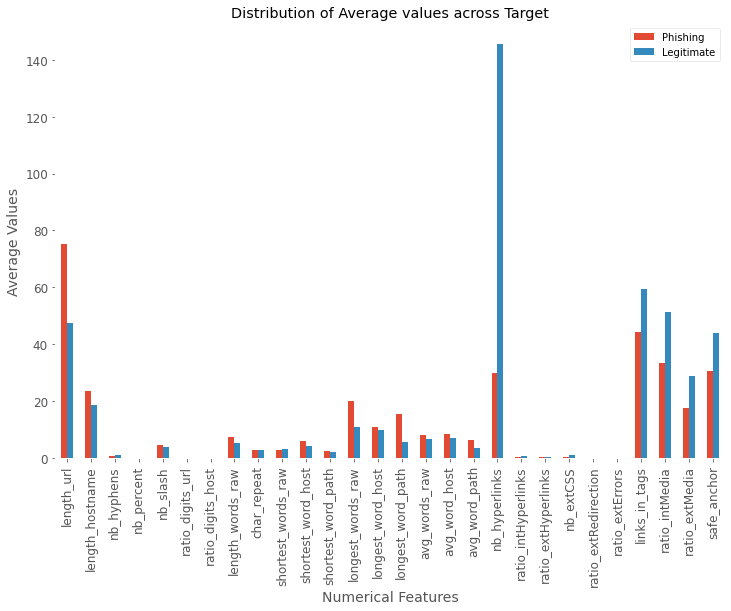

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt
df_distr =phishing_train.groupby('status')[num_cols].mean().reset_index().T
df_distr.rename(columns={1:"Phishing", 0:"Legitimate"}, inplace=True)

plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'
ax = df_distr[1:-3][['Phishing','Legitimate']].plot(kind='bar', title ="Distribution of Average values across Target", figsize=(12, 8), legend=True, fontsize=12)
ax.set_xlabel("Numerical Features", fontsize=14)
ax.set_ylabel("Average Values", fontsize=14)
plt.show()

In [37]:
phishing_train_f = phishing_train.drop("status", axis=1)
phishing_train_l = phishing_train["status"].copy()

In [38]:
phishing_test_f = phishing_test.drop("status", axis=1)
phishing_test_l = phishing_test["status"].copy()

In [39]:
phishing_numerical.columns

Index(['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_percent', 'nb_slash',
       'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space',
       'nb_www', 'nb_com', 'http_in_path', 'ratio_digits_url',
       'ratio_digits_host', 'nb_subdomains', 'nb_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'statistical_report',
       'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'nb_extCSS', 'ratio_extRedirection', 'ratio_extErrors', 'links_in_tags',
       'ratio_intMedia', 'ratio_extMedia', 'safe_anchor',
       'domain_registration_length', 'domain_age', 'web_traffic', 'page_rank'],
      dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler

col_names = phishing_numerical.columns
features = phishing_train_f[col_names]

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

phishing_train_f[col_names] = features

In [41]:
phishing_train_f.shape

(9144, 81)

In [42]:
fea = phishing_test_f[col_names]
fea = scaler.transform(fea)
phishing_test_f[col_names] = fea

In [43]:
phishing_test_f.shape

(2286, 81)

[0. 0. 0. ... 1. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1157
         1.0       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



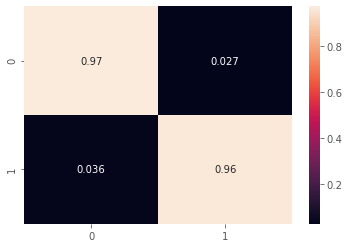

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 35)
rfc.fit(phishing_train_f, phishing_train_l)
rfc.score(phishing_train_f, phishing_train_l)
y_predict = rfc.predict(phishing_test_f)
print(y_predict)
sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1157
         1.0       0.96      0.93      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.95      0.94      0.94      2286
weighted avg       0.95      0.94      0.94      2286



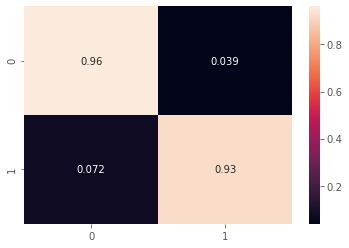

In [50]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(phishing_train_f, phishing_train_l)
y_predict = KNN.predict(phishing_test_f)


sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1157
         1.0       0.97      0.96      0.96      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.96      0.96      2286
weighted avg       0.97      0.97      0.97      2286



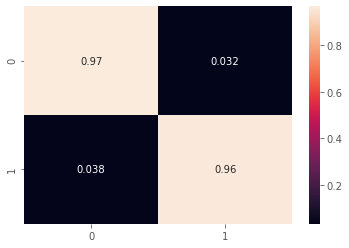

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(phishing_train_f, phishing_train_l)
y_predict = svc.predict(phishing_test_f)
sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1157
         1.0       0.98      0.95      0.96      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.96      0.96      2286
weighted avg       0.97      0.97      0.96      2286



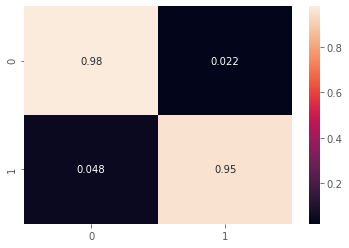

In [51]:
from sklearn.svm import SVC
svc_poly = SVC(kernel="poly", degree=3, C=3)
svc_poly.fit(phishing_train_f, phishing_train_l)
y_predict = svc_poly.predict(phishing_test_f)
sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1157
         1.0       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



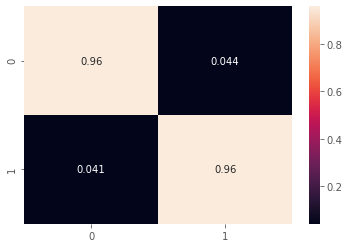

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=140)
lr.fit(phishing_train_f, phishing_train_l)
y_predict = lr.predict(phishing_test_f)
sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

[19:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1157
         1.0       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



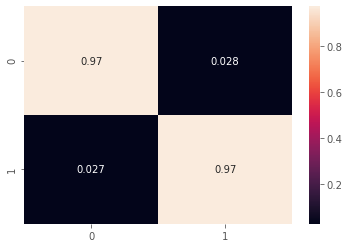

In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',
    nthread=4,
    seed=42)
xgb.fit(phishing_train_f, phishing_train_l)
y_predict = xgb.predict(phishing_test_f)
sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

In [94]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 35)
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
f1 = make_scorer(f1_score) 
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [ 100, 200, 500, 1000]
max_depth = [ 30, 40, 50]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = GridSearchCV(estimator = rf,

param_grid = random_grid,
               cv = 5, verbose=2, n_jobs = -1, scoring='accuracy')
rf_random.fit(phishing_train_f,phishing_train_l)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random grid:  {'n_estimators': [100, 200, 500, 1000], 'max_depth': [30, 40, 50], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}  



[0. 0. 0. ... 1. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1157
         1.0       0.97      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



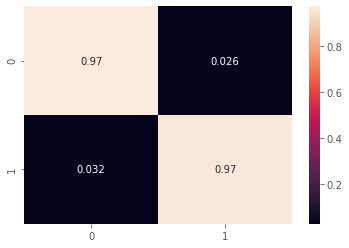

In [95]:
rf_random.best_estimator_.fit(phishing_train_f, phishing_train_l)
rf_random.best_estimator_.score(phishing_train_f, phishing_train_l)
y_predict = rf_random.best_estimator_.predict(phishing_test_f)
print(y_predict)
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

In [67]:
from xgboost import XGBClassifier


parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xgb_random = GridSearchCV(
    estimator=xgb,
    param_grid=parameters,
    scoring='accuracy',
    n_jobs = 10,
    cv = 5,
    verbose=True
)
xgb_random.fit(phishing_train_f,phishing_train_l)


# print the best parameters
print ('Best Parameters: ', xgb_random.best_params_, ' \n')



Fitting 5 folds for each of 96 candidates, totalling 480 fits
[23:29:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 180}  



[23:38:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 1 0 1]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1157
         1.0       0.97      0.98      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



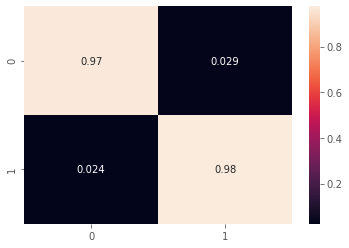

In [68]:
xgb_random.best_estimator_.fit(phishing_train_f, phishing_train_l)
xgb_random.best_estimator_.score(phishing_train_f, phishing_train_l)
y_predict = xgb_random.best_estimator_.predict(phishing_test_f)
print(y_predict)
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

[17:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      1157
         1.0       0.98      0.97      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



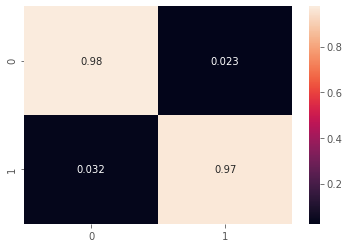

In [100]:
from sklearn.ensemble import VotingClassifier
xgb_voting = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic',
    nthread=4,
    seed=42)
rf_voting = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=1, 
                                   min_samples_split=2, n_estimators = 200 )
svc_voting = SVC(kernel="poly", degree=3, C=3)

voting_clf = VotingClassifier(
 estimators=[('xgb', xgb_voting), ('rf', rf_voting), ('svc', svc_voting)],
 voting='hard'
 )
voting_clf.fit(phishing_train_f, phishing_train_l)
y_predict = voting_clf.predict(phishing_test_f)

sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

In [87]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5, scoring = 'accuracy', n_jobs =-1 )
#Fit the model
best_model = clf.fit(phishing_train_f, phishing_train_l)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1157
         1.0       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



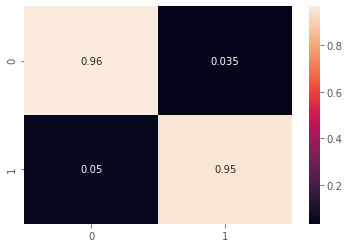

In [88]:
y_predict = best_model.best_estimator_.predict(phishing_test_f)

sns.heatmap(confusion_matrix(phishing_test_l, y_predict, normalize = 'true'), annot=True)
print(classification_report(phishing_test_l, y_predict))

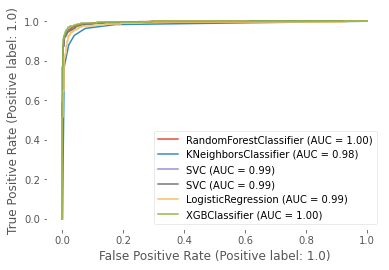

In [54]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve (rfc, phishing_test_f, phishing_test_l)
plot_roc_curve(KNN,phishing_test_f, phishing_test_l, ax = disp.ax_); 
plot_roc_curve(svc,phishing_test_f, phishing_test_l, ax = disp.ax_); 
plot_roc_curve(svc_poly,phishing_test_f, phishing_test_l, ax = disp.ax_); 
plot_roc_curve(lr,phishing_test_f, phishing_test_l, ax = disp.ax_) ;
plot_roc_curve(xgb,phishing_test_f, phishing_test_l, ax = disp.ax_) ;
